In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [23]:
series = pd.read_excel(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Forecasting\CocaCola_Sales_Rawdata.xlsx",header=0, index_col=0)

In [19]:
series.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [20]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


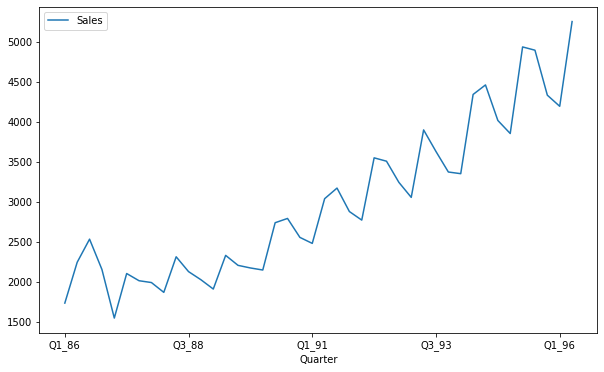

In [24]:
series.plot()
plt.show()


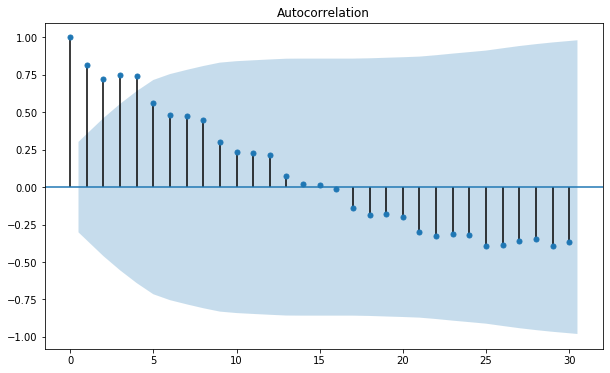

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=30)
plt.show()

In [29]:
series["t"] = np.arange(1,43)

series["t_sq"] = series["t"]*series["t"]

series["log_sales"] = np.log(series["Sales"])
series.head()

,Sales,t,t_sq,log_sales
Quarter,,,,
Q1_86,1734.827000,1,1,7.458663
Q2_86,2244.960999,2,4,7.716443
Q3_86,2533.804993,3,9,7.837477
Q4_86,2154.962997,4,16,7.675529
Q1_87,1547.818996,5,25,7.344602


## Splitting data

In [30]:
Train = series.head(35)
Test = series.tail(7)

## Forecasting using model based methods

In [31]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351143

In [32]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

493.34864848421216

In [33]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

511.811731941731

## Compare the results 

In [34]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293


Based on the above RMSE scores, Exponential is the best method for forescating

## Predict for new time period

In [43]:
predict_data = series.copy()
predict_data.head()

,Sales,t,t_sq,log_sales
Quarter,,,,
Q1_86,1734.827000,1,1,7.458663
Q2_86,2244.960999,2,4,7.716443
Q3_86,2533.804993,3,9,7.837477
Q4_86,2154.962997,4,16,7.675529
Q1_87,1547.818996,5,25,7.344602


In [44]:
#Build the model on entire data set
model_full = smf.ols('log_sales~t',data=predict_data).fit()

In [45]:
pred_new  = np.exp(pd.Series(model_full.predict(predict_data)))
pred_new 

Quarter
Q1_86    1730.830625
Q2_86    1773.361548
Q3_86    1816.937565
Q4_86    1861.584355
Q1_87    1907.328231
Q2_87    1954.196150
Q3_87    2002.215734
Q4_87    2051.415282
Q1_88    2101.823788
Q2_88    2153.470959
Q3_88    2206.387234
Q4_88    2260.603796
Q1_89    2316.152597
Q2_89    2373.066374
Q3_89    2431.378668
Q4_89    2491.123843
Q1_90    2552.337110
Q2_90    2615.054543
Q3_90    2679.313103
Q4_90    2745.150660
Q1_91    2812.606014
Q2_91    2881.718918
Q3_91    2952.530102
Q4_91    3025.081297
Q1_92    3099.415261
Q2_92    3175.575799
Q3_92    3253.607796
Q4_92    3333.557239
Q1_93    3415.471243
Q2_93    3499.398083
Q3_93    3585.387220
Q4_93    3673.489329
Q1_94    3763.756332
Q2_94    3856.241425
Q3_94    3950.999112
Q4_94    4048.085238
Q1_95    4147.557018
Q2_95    4249.473073
Q3_95    4353.893465
Q4_95    4460.879733
Q1_96    4570.494926
Q2_96    4682.803644
dtype: float64

In [46]:
predict_data["forecasted_Sales"] = pd.Series(pred_new)

In [47]:
predict_data.head()

,Sales,t,t_sq,log_sales,forecasted_Sales
Quarter,,,,,
Q1_86,1734.827000,1,1,7.458663,1730.830625
Q2_86,2244.960999,2,4,7.716443,1773.361548
Q3_86,2533.804993,3,9,7.837477,1816.937565
Q4_86,2154.962997,4,16,7.675529,1861.584355
Q1_87,1547.818996,5,25,7.344602,1907.328231
